<a href="https://colab.research.google.com/github/SDS-AAU/IntroStat/blob/master/Notebooks/AS_S2_Median_%26_Co_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #pandas (som næsten altid)
import numpy as np #numpy hvis der skal laves mere komplekse beregninger
import seaborn as sns #seaborn til plots

from matplotlib import pyplot as plt #plot control

sns.set() #plot style


from IPython.display import HTML #Youtube embed

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Anvendt statistik S2 - Hands-on

Her kommer vi til at se på et datasæt af pingviner (man kan læse mere om data her: https://github.com/allisonhorst/palmerpenguins)

![](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

Hvis du har 2 minutter og vil vide mere om disse pingviner, så er der en kort video om dem...

In [2]:
HTML('<iframe width="700" height="400" src="https://www.youtube-nocookie.com/embed/QS5jpQ6cpsg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [3]:
# Vi åbner vores penvin data direkte fra github
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [4]:
# første 5 rækker
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
# info viser, at der er nogle datapunkter, der mangler...
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
# her sletter vi alle rækker, hvor der mangler data for en eller anden variabel

penguins = penguins.dropna()

In [7]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


## Simple frekvens beregninger

- Hvor mange han/hun pingviner?
- Hvor mange pingviner af de forskellige arter?
- Hvor mange øer er der?
- Gennemsnit for `body_mass_g` (vægt) per køn og art.


In [8]:
# Hvor mange han/hun pengviner?
penguins.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [9]:
# Hvor mange pengviner af de forskellige arter?
penguins.species_short.value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species_short, dtype: int64

In [10]:
# Hvor mange øer (observationer af forskellige) er der?
penguins.island.value_counts()

Biscoe       164
Dream        123
Torgersen     47
Name: island, dtype: int64

In [11]:
# Gennemsnit for body_mass_g (vægt) per køn.
penguins[penguins.sex == 'MALE'].body_mass_g.mean()

4545.684523809524

In [12]:
penguins[penguins.sex == 'FEMALE'].body_mass_g.mean()

3862.2727272727275

In [13]:
# Gennemsnit for body_mass_g (vægt) per art.

penguins.species_short.unique() # vi starter med at se på hvor mange unike arter der er

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [14]:
penguins.groupby(by='species_short').body_mass_g.mean() # groupby og mean er en nem måde at beregne det hele med lidt kode...

species_short
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5090.625000
Name: body_mass_g, dtype: float64

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png)

Mere om groupby og aggregation
(https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html)

## Beregning af nøgletal der beskriver fordeling

- median
- percentiler

In [17]:
# median
penguins.body_mass_g.median()

4050.0

In [18]:
# 25 percentil
penguins.body_mass_g.quantile(q=0.25)

3550.0

In [19]:
# 75 percentil
penguins.body_mass_g.quantile(q=0.75)

4793.75

In [20]:
# med numpy:

np.percentile(penguins.body_mass_g, 25)

# hvis der er manglende data, så skal vi bruge "nanpercentile" i numpy
# np.nanpercentile(penguins.body_mass_g, 25) 


3550.0

In [21]:
# eller:

penguins.body_mass_g.describe()

count     334.000000
mean     4209.056886
std       804.836129
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4793.750000
max      6300.000000
Name: body_mass_g, dtype: float64

In [22]:
# og det kan man også bruge i kombination med groupby!

penguins.groupby('species_short').body_mass_g.describe()

,count,mean,std,min,25%,50%,75%,max
species_short,,,,,,,,
Adelie,146.0,3706.164384,458.620135,2850.0,3362.5,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,120.0,5090.625000,499.759002,3950.0,4700.0,5050.0,5500.0,6300.0


## Visualisering af numeriske variable og fordelinger

Her kigger vi på forskellige muligheder at visualisere og præsentere fordelinger af én variable i Python med Seaborn

*   Swarmplot
*   Boxplot
* Histogram (KDE-plot) mm



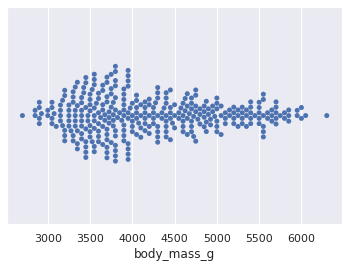

In [23]:
# plot body_mass_g for alle pengviner som swarmplat

sns.swarmplot(penguins.body_mass_g)


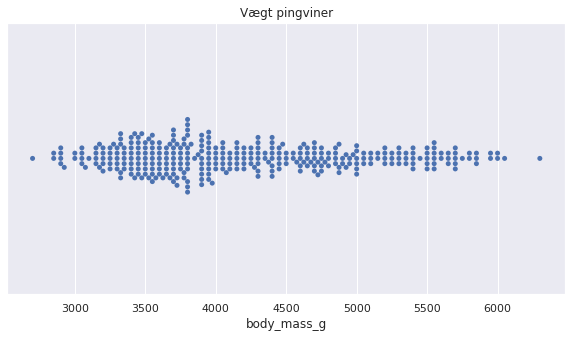

In [24]:
#lidt større og med overskrift
plt.figure(figsize=(10,5))
plt.title('Vægt pingviner')

sns.swarmplot(penguins.body_mass_g)

En swarmplot er nok den nemmeste visualisering af en variable. Her plottes bare punkter for hver pengvin på 1 akse. Bagefer sorteres punkterne lidt...

Nedenunder er den udgave uden sortering (stripplot)

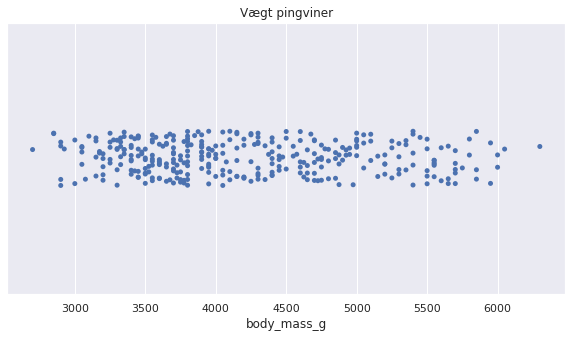

In [25]:
#lidt større og med overskrift
plt.figure(figsize=(10,5))
plt.title('Vægt pingviner')

sns.stripplot(penguins.body_mass_g)

En swarmplot siger ikke alt for meget. Lad os prøve at lave en boxplot

![](https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png)

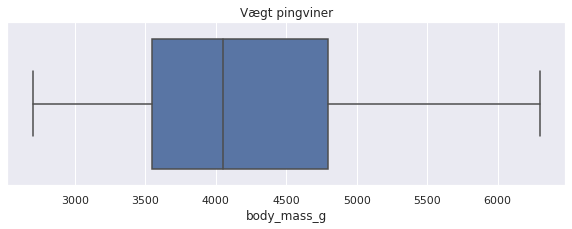

In [26]:
plt.figure(figsize=(10,3))
plt.title('Vægt pingviner')

sns.boxplot(penguins.body_mass_g)


[Text(0.5, 0, 'Vægt i g')]

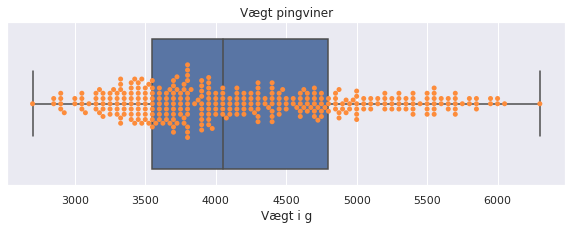

In [27]:
plt.figure(figsize=(10,3))
plt.title('Vægt pingviner')

# to plots over hinanden
g = sns.boxplot(penguins.body_mass_g) # g = defineres for at kunne beskrive X-akse
sns.swarmplot(penguins.body_mass_g, palette='Oranges')

g.set(xlabel='Vægt i g')

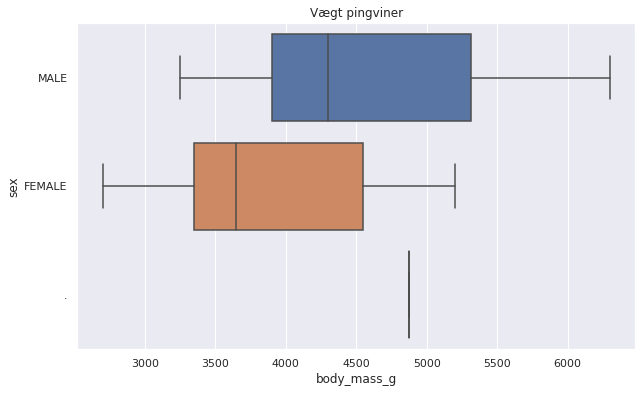

In [28]:
# opdeling: han/hun - pingviner

plt.figure(figsize=(10,6))
plt.title('Vægt pingviner')

sns.boxplot(data = penguins, x = "body_mass_g", y = "sex")

In [29]:
penguins.sex.unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

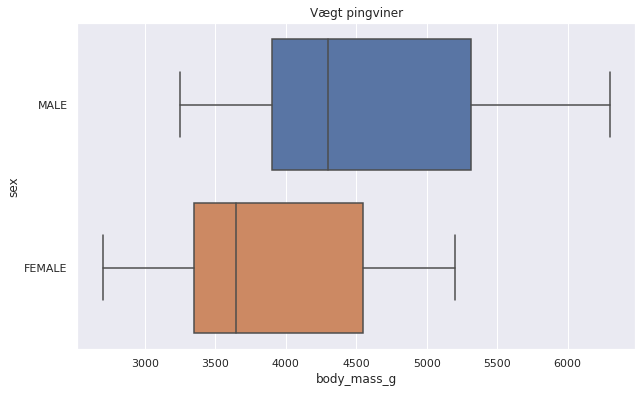

In [30]:
# opdeling: han/hun - pingviner

plt.figure(figsize=(10,6))
plt.title('Vægt pingviner')

sns.boxplot(data = penguins[penguins.sex.isin(['MALE', 'FEMALE'])], x = "body_mass_g", y = "sex")

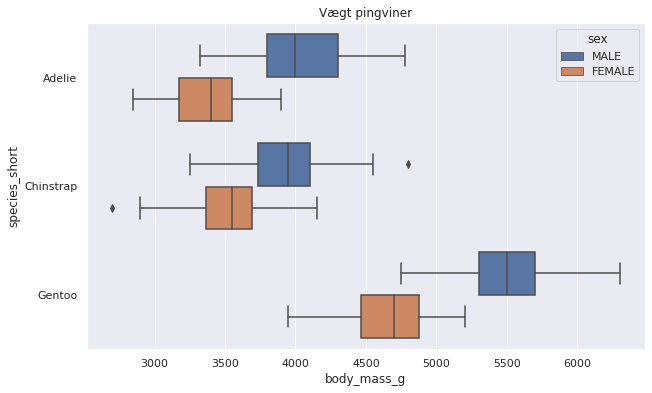

In [31]:
# opdeling på art og køn

# opdeling: han/hun - pingviner

plt.figure(figsize=(10,6))
plt.title('Vægt pingviner')

sns.boxplot(data = penguins[penguins.sex.isin(['MALE', 'FEMALE'])], x = "body_mass_g", y = "species_short" , hue = "sex")

Kan vi bruge flere "datapunkter" som input til vores visualisering? Yes! Vi kan prøve at lave et histogram.

Lad os prøve at udvikle et histogram først fra bunden.


In [32]:
#Vi kan skære vores data i intervaller (som aldersgrupper i Titanic)

penguins_cat = pd.cut(penguins.body_mass_g, bins = 15) #vi gemmer det i en ny "Series" udenfor vores penguins DataFrame

In [36]:
# og sådan ser det ud hvis vi tæller hvor mange pingviner der findes inden for grupperne
penguins_cat.value_counts(sort=False)

(2696.4, 2940.0]     8
(2940.0, 3180.0]    14
(3180.0, 3420.0]    34
(3420.0, 3660.0]    45
(3660.0, 3900.0]    49
(3900.0, 4140.0]    27
(4140.0, 4380.0]    27
(4380.0, 4620.0]    25
(4620.0, 4860.0]    28
(4860.0, 5100.0]    22
(5100.0, 5340.0]    13
(5340.0, 5580.0]    20
(5580.0, 5820.0]    13
(5820.0, 6060.0]     8
(6060.0, 6300.0]     1
Name: body_mass_g, dtype: int64

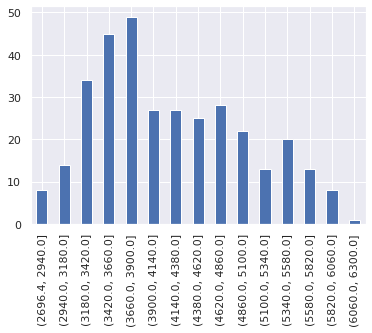

In [37]:
# og så kan vi lige plotte det (bare ved at bruge pandas indbyggede plot funktioner)
penguins_cat.value_counts(sort=False).plot(kind='bar')

[Text(0.5, 0, 'Vægt i g')]

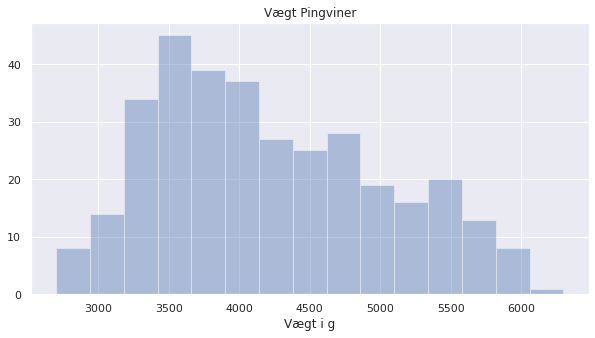

In [38]:
# Det kan også gøres nemmere

plt.figure(figsize=(10,5))
plt.title('Vægt Pingviner')

g = sns.distplot(penguins.body_mass_g, hist = True, kde = False, bins=15)

g.set(xlabel='Vægt i g')

[Text(0.5, 0, 'Vægt i g')]

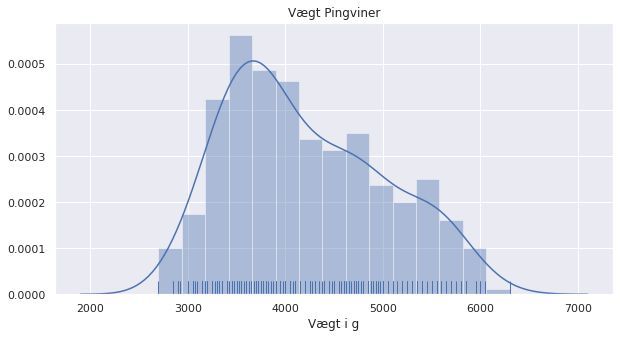

In [39]:
# Her tilføjer vi lige KDE og rug
plt.figure(figsize=(10,5))
plt.title('Vægt Pingviner')

g = sns.distplot(penguins.body_mass_g, hist = True, kde = True, rug=True, bins=15)

g.set(xlabel='Vægt i g')

Text(0.5, 1.0, 'Vægt pingviner')

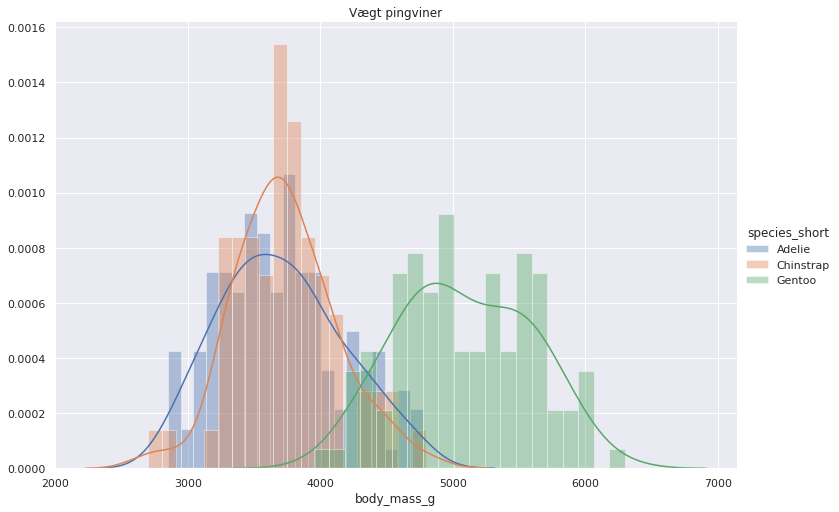

In [40]:
# Og så kan vi lige lave 3 histogrammer i en plot

g = sns.FacetGrid(penguins, hue="species_short", height=7, aspect=1.5)
g = g.map(sns.distplot, "body_mass_g", bins=20)
g.add_legend()
plt.title('Vægt pingviner')

## Varians og standard-afvigelse
I dette afsnit vil vi kigge nærmere på fordelingen af observationer. I de ovenstående afsnit kunne man gennem, blandt andet, boxplot og swarmplot se, at nogle af observationerne i data havde relativt stor afstand til de resterende punkter. Disse observationer er meget normale i det meste data, og bliver beskrevet som outliers. 

Outliers er som oftest en naturlig del af databehandling, men kan også nogle gange være udtryk for datafejl, eller skævvridning af data, derfor er det vigtigt at forstå og kunne bearbejde disse data og outliers på en meningsfuld måde når man skal lave analyse.

Her vil i blive præsenteret for **varians** og **standardafvigelse**, to metoder til at vurdere spredning af data. 




